In [169]:
## Trained CIFAR10 
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.models import Model
from keras.models import Sequential

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator




In [158]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [159]:
nb_classes = 10
#[0-1]
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
#one-hot
y_train = keras.utils.to_categorical(y_train,nb_classes)
y_test = keras.utils.to_categorical(y_test,nb_classes)

In [160]:
#CIFAR10 Model
model = Sequential()

# Block1
model.add(Conv2D(64, (3, 3),activation="relu",padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3),activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Block2
model.add(Conv2D(128, (3, 3),activation="relu",padding='same'))
model.add(Conv2D(128, (3, 3),activation="relu",padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Block3
model.add(Conv2D(256,(3,3),activation="relu",padding='same',))
model.add(Conv2D(256,(3,3),activation="relu",padding='same',))
model.add(Conv2D(256,(3,3),activation="relu",padding='same',))
model.add(Conv2D(256,(3,3),activation="relu",padding='same',))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# LinearBlock
model.add(Flatten())
model.add(Dense(1024,activation="relu",name="FC1"))
model.add(Dense(1024,activation="relu",name="FC2"))
model.add(Dense(nb_classes,name="output"))
model.add(Activation('softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

batch_size=32
nb_epoch=1
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_data=(x_test,y_test))
model.save("cifar10_epoch40.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_227 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 8, 8, 128)         0         
__________

In [230]:
#GPUで40epochまわした結果をload
from keras.models import load_model
model = load_model("395_cifar10_aug.hdf5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [197]:
Label = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

correct: cat
predict: cat


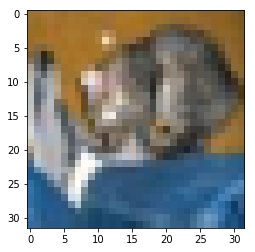

In [231]:
%matplotlib inline
pic_num = 0
pred = np.argmax(model.predict(x_test[pic_num].reshape(1,32,32,3)))
plt.imshow(x_test[pic_num].reshape(32,32,3))
print("correct:",Label[np.argmax(y_test[pic_num])] )
print("predict:",Label[pred])

In [232]:
#test pred
total_pic = len(x_test)
count=0
for num in range(total_pic):
    if np.argmax(y_test[num]) == np.argmax(model.predict(x_test[num].reshape(1,32,32,3))):
        count+=1
print(total_pic,count,count/total_pic)

10000 8020 0.802
